In [25]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
import cv2
import random

In [26]:

classes = ['daisy', 'dandelion', 'rose', 'sunflower','tulip']

# Arrays to hold the images and labels
X_train, Z_train = [], []
X_val, Z_val = [], []
X_test, Z_test = [], []

def assign_label(flower_type):
    flower_type = flower_type.lower()  
    if flower_type in classes:
        return classes.index(flower_type)  
    else:
        print(f"Warning: Unrecognized flower type: {flower_type}")
        return None  

# Define dataset path
inputdataset = "/Users/rigensuringa/Desktop/dataset_new"

# Function to load images from a given folder
def load_images_from_folder(folder_path, X, Z):
    for flower in os.listdir(folder_path):
        flower_path = os.path.join(folder_path, flower)

        if not os.path.isdir(flower_path):  # Skip if it's not a folder
            continue

        label = assign_label(flower)  # Assign label based on folder name
        if label is None:
            print(f"Skipping folder: {flower_path} due to invalid label")
            continue  # Skip this folder if label is invalid

        for filename in os.listdir(flower_path):
            img_path = os.path.join(flower_path, filename)

            # Read the image using OpenCV
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)

            if img is None:
                print(f"Warning: {img_path} could not be loaded.")
                continue

            img = cv2.resize(img, (150,150))

            img = img / 255.0

            X.append(img)
            Z.append(label)

# Load images for training, validation, and test datasets
train_folder = os.path.join(inputdataset, 'train')
val_folder = os.path.join(inputdataset, 'val')
test_folder = os.path.join(inputdataset, 'test')

# Load images for each dataset
load_images_from_folder(train_folder, X_train, Z_train)
load_images_from_folder(val_folder, X_val, Z_val)
load_images_from_folder(test_folder, X_test, Z_test)

# Convert lists to numpy arrays
X_train = np.array(X_train)
Z_train = np.array(Z_train)

X_val = np.array(X_val)
Z_val = np.array(Z_val)

X_test = np.array(X_test)
Z_test = np.array(Z_test)

# One-hot encode the labels
Y_train = to_categorical(Z_train, len(classes))
Y_val = to_categorical(Z_val, len(classes))
Y_test = to_categorical(Z_test, len(classes))




Index: 221, Label: 0, Image shape: (150, 150, 3)
Index: 2691, Label: 1, Image shape: (150, 150, 3)
Index: 644, Label: 0, Image shape: (150, 150, 3)
Index: 2480, Label: 1, Image shape: (150, 150, 3)
Index: 2997, Label: 1, Image shape: (150, 150, 3)
Index: 1269, Label: 2, Image shape: (150, 150, 3)
Index: 1711, Label: 4, Image shape: (150, 150, 3)
Index: 1418, Label: 2, Image shape: (150, 150, 3)
Index: 3034, Label: 1, Image shape: (150, 150, 3)


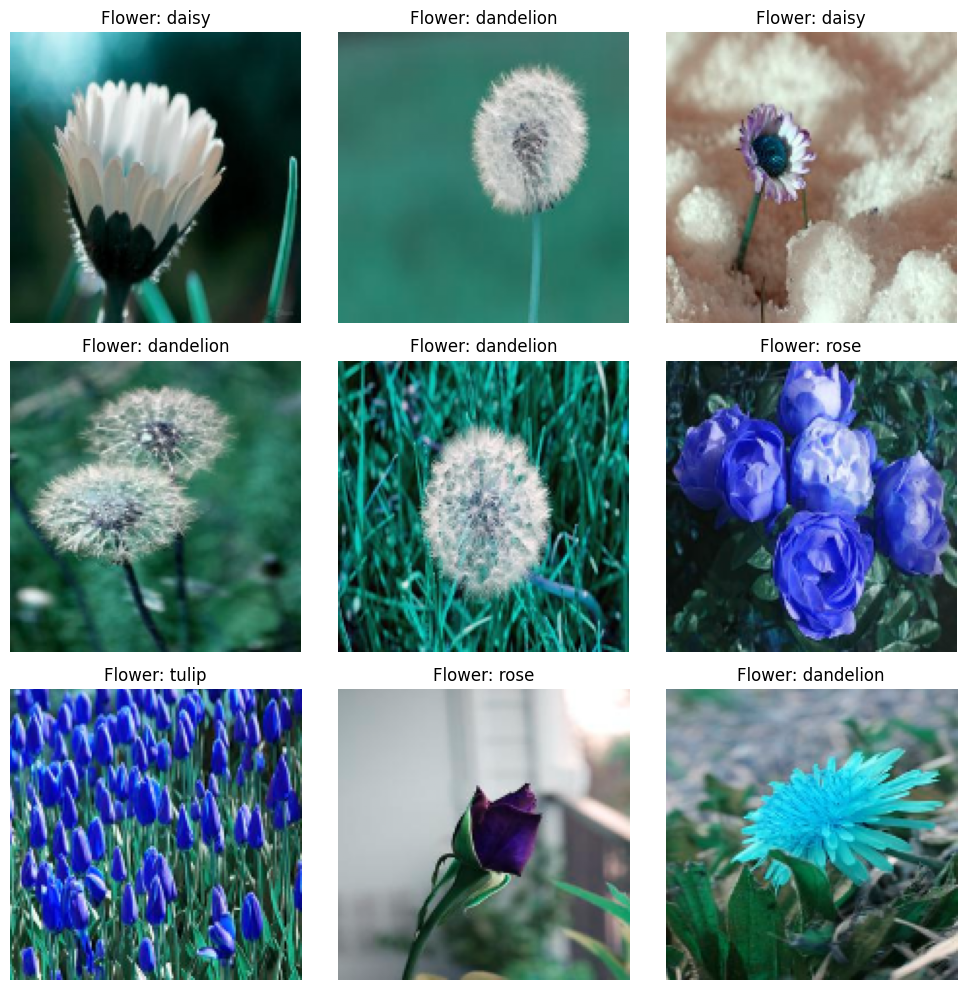

In [27]:
figure, axes = plt.subplots(3, 3)  # Create a 3x3 grid for image display
figure.set_size_inches(10, 10)  # Set the size of the figure

for row in range(3):
    for col in range(3):
        index = random.randint(0, len(X_train) - 1)  # Get a random index
        image = X_train[index]  # Get the image
        flower_label = Z_train[index]  # Get the corresponding label

        # Debugging output
        print(f"Index: {index}, Label: {flower_label}, Image shape: {image.shape}")

        # Plot the image on the grid
        axes[row, col].imshow(image)  # Display image
        axes[row, col].set_title(f"Flower: {classes[flower_label]}")  # Set title with label
        axes[row, col].axis('off')  # Hide axes for cleaner visualization

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [28]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

In [29]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3))) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3),  activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3),  activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3),  activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

In [30]:

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))


model.add(Dense(5, activation = "softmax"))


model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,004,677 (7.65 MB)

 Trainable params: 2,004,677 (7.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model_checkpoint = ModelCheckpoint(
    filepath='best_model.keras',
    save_best_only=True,
    monitor='val_loss'
)

history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=32),  
    epochs=80,
    validation_data=(X_val, Y_val), 
    callbacks=[early_stopping,model_checkpoint]
)


Epoch 1/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 46s 363ms/step - accuracy: 0.3424 - loss: 1.4202 - val_accuracy: 0.5560 - val_loss: 1.0075
Epoch 2/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 50s 399ms/step - accuracy: 0.5745 - loss: 0.9513 - val_accuracy: 0.6540 - val_loss: 0.9083
Epoch 3/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 55s 443ms/step - accuracy: 0.6624 - loss: 0.8495 - val_accuracy: 0.7360 - val_loss: 0.7156
Epoch 4/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 51s 407ms/step - accuracy: 0.7408 - loss: 0.7446 - val_accuracy: 0.7300 - val_loss: 0.7029
Epoch 5/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 51s 406ms/step - accuracy: 0.7590 - loss: 0.6828 - val_accuracy: 0.7740 - val_loss: 0.6395
Epoch 6/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 51s 411ms/step - accuracy: 0.7946 - loss: 0.6064 - val_accuracy: 0.8400 - val_loss: 0.5294
Epoch 7/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 51s 408ms/step - accuracy: 0.7888 - loss: 0.5659 - val_accuracy: 0.8400 - val_loss: 0.5102
Epoch 8/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 51s 405ms/step - accuracy: 0.8272 - loss: 0

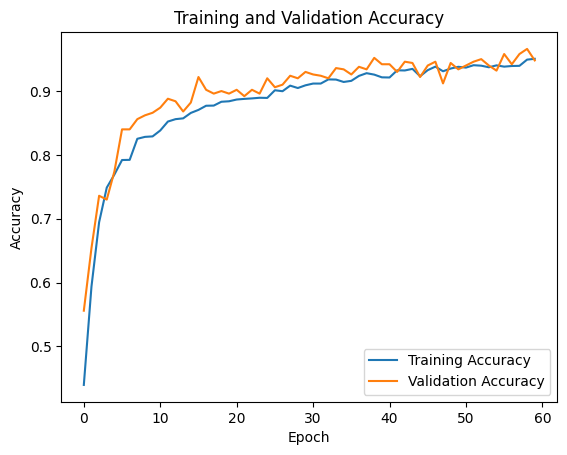

In [32]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')
plt.show()

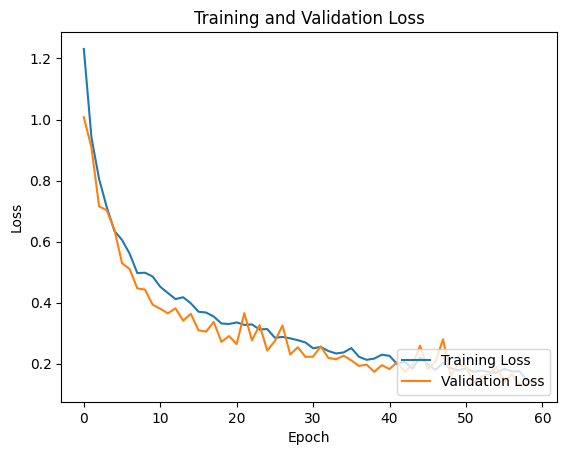

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.9571 - loss: 0.1575


In [33]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')  
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.show()
val_loss, val_acc = model.evaluate(X_val, Y_val)

In [34]:
model = tf.keras.models.load_model('best_model.keras')

test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f"Final Test Accuracy: {test_acc:.2f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.9566 - loss: 0.3387
Final Test Accuracy: 0.96


In [35]:
model.save('final_model.keras')

In [36]:
image_path = '/Users/rigensuringa/Desktop/r.jpg'

# Load the image with the same size as the model's input size
img = load_img(image_path, target_size=(150, 150))  # Adjust (224, 224) to your model's input size
img_array = img_to_array(img)  # Convert image to a NumPy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize to [0, 1] if your model expects normalized input

print(f"Image shape after preprocessing: {img_array.shape}")
model = tf.keras.models.load_model('final_model.keras')

# Predict the class
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]  # Get the predicted class index
confidence = np.max(predictions)  # Get confidence score

# Print the class name and confidence
print(f"Predicted flower type: {classes[predicted_class]}")
print(f"Confidence: {confidence:.2f}")

Image shape after preprocessing: (1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted flower type: rose
Confidence: 0.91
